## 讀取資料

In [1]:
import pandas
dfs = pandas.read_html('https://rate.bot.com.tw/xrt/quote/l6m/USD')

In [5]:
df = dfs[0].iloc[:,0:4]

In [6]:
df.columns = ['掛牌日期', '幣別', '現金匯率 - 本行買入','現金匯率 - 本行賣出']

In [8]:
df.head()

,掛牌日期,幣別,現金匯率 - 本行買入,現金匯率 - 本行賣出
0,2019/07/15,美金 (USD),30.640,31.310
1,2019/07/12,美金 (USD),30.670,31.340
2,2019/07/11,美金 (USD),30.620,31.290
3,2019/07/10,美金 (USD),30.735,31.405
4,2019/07/09,美金 (USD),30.765,31.435


## 用Python 做按鍵精靈

In [12]:
import pyautogui
#pyautogui.position()
pyautogui.click(1065, 45, duration=3)

## 資料清理

In [13]:
df.head()

,掛牌日期,幣別,現金匯率 - 本行買入,現金匯率 - 本行賣出
0,2019/07/15,美金 (USD),30.640,31.310
1,2019/07/12,美金 (USD),30.670,31.340
2,2019/07/11,美金 (USD),30.620,31.290
3,2019/07/10,美金 (USD),30.735,31.405
4,2019/07/09,美金 (USD),30.765,31.435


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
掛牌日期           120 non-null object
幣別             120 non-null object
現金匯率 - 本行買入    120 non-null float64
現金匯率 - 本行賣出    120 non-null float64
dtypes: float64(2), object(2)
memory usage: 3.8+ KB


In [15]:
import pandas
df['掛牌日期'] = pandas.to_datetime(df['掛牌日期'], format = '%Y/%m/%d')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
掛牌日期           120 non-null datetime64[ns]
幣別             120 non-null object
現金匯率 - 本行買入    120 non-null float64
現金匯率 - 本行賣出    120 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.8+ KB


## 資料儲存

In [17]:
df.to_excel('rate.xlsx')

In [18]:
import sqlite3 as sqlite
with sqlite.connect('rate.sqlite') as db:
    df.to_sql('rate', con = db)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/pandas/core/generic.py:2531: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype, method=method)


In [20]:
import sqlite3 as sqlite
with sqlite.connect('rate.sqlite') as db:
    df2  = pandas.read_sql_query('select avg("現金匯率 - 本行買入") from rate', con = db)
df2

,"avg(""現金匯率 - 本行買入"")"
0,30.595


## 資料視覺化

In [41]:
import sqlite3 as sqlite
with sqlite.connect('rate.sqlite') as db:
    df  = pandas.read_sql_query('select * from rate', con = db)

In [43]:
df = df.sort_values('掛牌日期')

In [44]:
df.set_index('掛牌日期', inplace=True)

Populating the interactive namespace from numpy and matplotlib


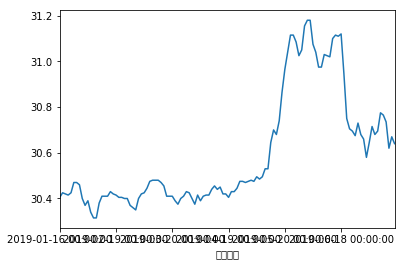

In [46]:
%pylab inline
df['現金匯率 - 本行買入'].plot(kind = 'line')

In [47]:
df['ma30'] = df['現金匯率 - 本行買入'].rolling(window = 30).mean()

In [48]:
df.head()

,index,幣別,現金匯率 - 本行買入,現金匯率 - 本行賣出,ma30
掛牌日期,,,,,
2019-01-16 00:00:00,119,美金 (USD),30.405,31.095,NaN
2019-01-17 00:00:00,118,美金 (USD),30.425,31.115,NaN
2019-01-18 00:00:00,117,美金 (USD),30.420,31.110,NaN
2019-01-19 00:00:00,116,美金 (USD),30.415,31.105,NaN
2019-01-21 00:00:00,115,美金 (USD),30.425,31.115,NaN


Populating the interactive namespace from numpy and matplotlib


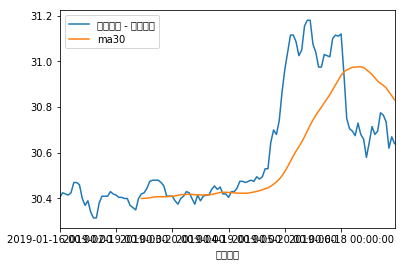

In [49]:
%pylab inline
df[['現金匯率 - 本行買入','ma30']].plot(kind = 'line')

## 預測客戶是否流失

In [23]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/digiplus_ds/master/data/customer_churn.csv', index_col=0)

In [24]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [25]:
df = df.iloc[:,3:]

In [27]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [28]:
df.select_dtypes('object').head()

,international_plan,voice_mail_plan,churn
1,no,yes,no
2,no,yes,no
3,no,no,no
4,yes,no,no
5,yes,no,no


In [29]:
df['international_plan'] = df['international_plan'].replace({'yes': 1, 'no': 0})
df['voice_mail_plan'] = df['voice_mail_plan'].replace({'yes': 1, 'no': 0})
df['churn'] = df['churn'].replace({'yes': 1, 'no': 0})

In [30]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [31]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(max_depth=5)
clf1.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
predicted = clf1.predict(X)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, predicted)

0.9525952595259526

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
clf2 = GradientBoostingClassifier()
clf2.fit(X,Y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [39]:
predicted = clf2.predict(X)

In [40]:
accuracy_score(Y, predicted)

0.9711971197119712